# Exam


## Problem 2. Interpolation
---

!["Interpolation comparison example"](assets/interp_sample.png)
> Linear Spline Interpolation visualization, courtesy of [codecogs](http://www.codecogs.com/library/maths/approximation/interpolation/univariate.php#sec3)

Interpolation is a method of [curve fitting](https://en.wikipedia.org/wiki/Curve_fitting).  
In this problem, [spline interpolation](https://en.wikipedia.org/wiki/Interpolation#Spline_interpolation) is considered

Practical applications:
+ estimating function values based on some sample of known data points

---

#### Problem
Given the inputs and function values below, approximate `f(-1)` and `f(1)` by **linear spline functions**.

In [1]:
from IPython.display import display
import pandas as pd
import matplotlib.pyplot
%matplotlib inline

In [2]:
index = ['f(x)']
columns = [-2, 0, 2, 3]
data = [[-3, -5, 9, 22]]

df = pd.DataFrame(data, index=index, columns=columns)
print(df)

      -2   0   2   3
f(x)  -3  -5   9  22


,1,2,3,4
x,-2,0,2,3
f(x),-3,-5,9,22


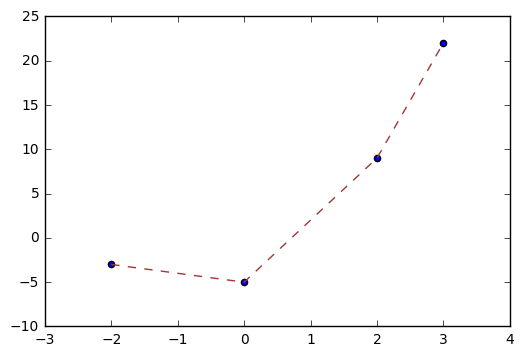

In [3]:
# for brevity, we will write it like this
index = ['  x', 'f(x)']
columns = [1, 2, 3, 4] #['x1', 'x2', 'x3', 'x4']
data = [[-2, 0, 2, 3], [-3, -5, 9, 22]]

df = pd.DataFrame(data, index=index, columns=columns)
display(df)

matplotlib.pyplot.plot(data[0], data[1], ls='dashed', color='#a23636')
matplotlib.pyplot.scatter(data[0], data[1])
matplotlib.pyplot.show()


**Linear spline functions** are calculated with the following:
  
$$i \in [1,\ \left\vert{X}\right\vert - 1],\ i \in \mathbb{N}: $$  
$$P_i = \frac{x-x_i}{x_{i+1}-x_i} * y_{i+1} + \frac{x_{i+1}-x}{x_{i+1}-x_i} * y_i$$


By simplification, we can reduce to the following:

$$P_i = \frac{y_{i+1} (x-x_i) + y_i (x_{i+1}-x)}{x_{i+1}-x_i} = \frac{(y_{i+1}*x - y_i*x) - y_{i+1}*x_i + y_i*x_{i+1}}{x_{i+1}-x_i}$$

The final form used will be:
$$P_i = \frac{(y_{i+1}*x - y_i*x) + (y_i*x_{i+1} - y_{i+1}*x_i)}{(x_{i+1}-x_i)}$$

As it can be seen, **the only gist** would be to emulate the `x` in the first term (`num1s` **below**), the other terms being numbers (`num2`, `den`). Parantheses used to isolate the formula for each of the 3 variables.  
  
As such, we can write the parantheses as a string, while the others will be simply calculated. After this, the final string is **evaluated as a lambda function**.


In [4]:
print('x1 = %i' % data[0][0])
print('y1 = %i' % data[1][0])
print('---')

# linear spline function aproximation
print('no values: %i' % len(columns))

spline = {}

for i in range(len(columns)-1):
    print('\nP[' + str(i+1) + ']')
    
    # we calculate the numerator
    num_1s = str(data[1][i+1]) + ' * x - ' + str(data[1][i]) + ' * x'
    print('num_1s: %s' % num_1s)
    
    num_2  = data[1][i] * data[0][i+1] - data[1][i+1] * data[0][i]
    print('num_2: %i' % num_2)
    
    # we calculate the denominator
    den = data[0][i+1] - data[0][i]
    print('den: %i' % den)
    
    # constructing the function
    func = 'lambda x: (' + num_1s + str(num_2) + ') / ' + str(den)
    print('func: %s' % func)
    spline[i] = eval(func)

print('---')

# sanity checks
# P1(x) = -x - 5
assert (spline[0](-5) == 0),"For this example, the value should be 0, but the value returned is " + str(spline[0](-5))
# P2(x) = 4x + 1
# TODO: this is failing (checked my solution, probably my assertion is wrong) !
#assert (spline[1](0) == 1),"For this example, the value should be 1, but the value returned is " + str(spline[1](0))
# P3(x) = 13x - 17
assert (spline[2](1) == -4),"For this example, the value should be -4, but the value returned is " + str(spline[2](1))

x1 = -2
y1 = -3
---
no values: 4

P[1]
num_1s: -5 * x - -3 * x
num_2: -10
den: 2
func: lambda x: (-5 * x - -3 * x-10) / 2

P[2]
num_1s: 9 * x - -5 * x
num_2: -10
den: 2
func: lambda x: (9 * x - -5 * x-10) / 2

P[3]
num_1s: 22 * x - 9 * x
num_2: -17
den: 1
func: lambda x: (22 * x - 9 * x-17) / 1
---


In [5]:
print('Approximating values of S\n---')
aproximation_queue = [-1, 1]
results = {}

def approximate(spline, val):
    for i in range(len(spline)-1):
        if data[0][i] <= val <= data[0][i+1]:
            print('Approximation using P[%i] is: %i' % (i, spline[i](val)))
            results[val] = spline[i](val)

for i in range(len(aproximation_queue)):
    approximate(spline, aproximation_queue[i])

# sanity checks
# S(-1) = P1(-1) = -4
assert (spline[0](-1) == -4),"For this example, the value should be -4, but the value returned is " + str(spline[0](-5))
# S(1) = P2(1) = 5
# TODO: same as above !
#assert (spline[1](1) == 5),"For this example, the value should be 5, but the value returned is " + str(spline[1](0))

Approximating values of S
---
Approximation using P[0] is: -4
Approximation using P[1] is: 2


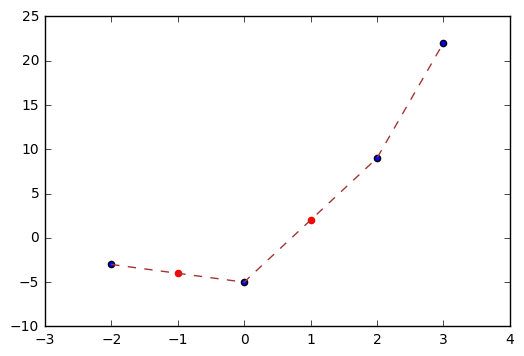

In [6]:
#x.extend(results.keys())
#y.extend(results.values())
x2 = list(results.keys())
y2 = list(results.values())

matplotlib.pyplot.plot(data[0], data[1], ls='dashed', color='#a23636')
matplotlib.pyplot.scatter(data[0], data[1])
matplotlib.pyplot.scatter(x2, y2, color='#ff0000')

matplotlib.pyplot.show()

As it can be seen, in **linear spline interpolation**, all approximations will be **found on the line**.  
Depending on the sample size and on the original function this may result in deviation from the function curve.

---